In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('Social_Network.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [6]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
ohe=OneHotEncoder(sparse_output=False)

In [9]:
df['Gender']=ohe.fit_transform(df[['Gender']])

In [11]:
X=df.drop('Purchased',axis=1)

In [12]:
Y=df['Purchased']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,auc,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler

In [15]:
scale =StandardScaler()

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

In [19]:
model=LogisticRegression()

In [20]:
model.fit(X_train_scaled,Y_train)

LogisticRegression()

In [21]:
Y_pred=model.predict(X_test_scaled)

In [22]:
CM= confusion_matrix(Y_test,Y_pred)

In [24]:
print('Confusion matrix  \n', CM)

Confusion matrix  
 [[50  2]
 [ 7 21]]


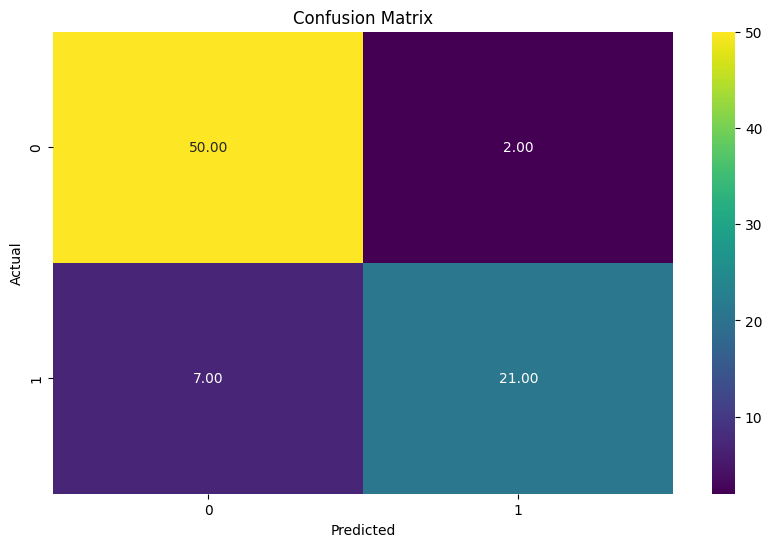

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(CM,annot=True,fmt=".2f",cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
tp,tn,fp,fn=CM.ravel()

In [30]:
print('True Positive \t',tp)
print('True Negative \t',tn)
print('False Positive \t',fp)
print('False Negative \t',fn)

True Positive 	 50
True Negative 	 2
False Positive 	 7
False Negative 	 21


In [41]:
accuracy =accuracy_score(Y_test,Y_pred)
accuracy =accuracy_score(Y_test,Y_pred)
precision=precision_score(Y_test,Y_pred)
recall =recall_score(Y_test,Y_pred)
print('Accuracy \t ', "{:.2f}".format(accuracy))
print('Precision \t',"{:.2f}".format(precision))
print('Recall    \t',recall)


Accuracy 	  0.89
Precision 	 0.91
Recall    	 0.75


In [44]:
tpr,fpr,threshold=roc_curve(Y_test,Y_pred)
auc_score=auc(tpr,fpr)
print('AUC \t',"{:.2f}".format(auc_score))

AUC 	 0.86


ValueError: range() arg 3 must not be zero

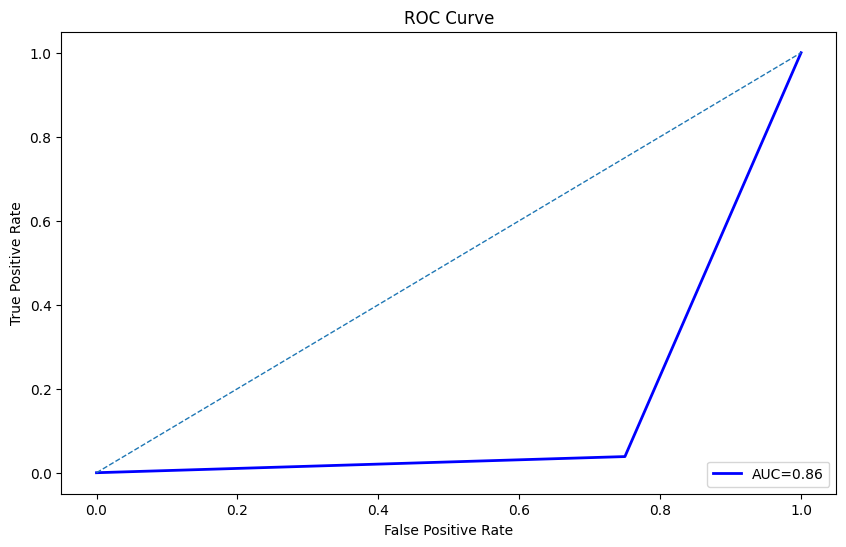

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,linewidth=2,color='Blue',label=f'AUC={"{:.2f}".format(auc_score)}')
plt.plot([0,1],[0,1],linewidth=1,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
for i in range(0, len(fpr), int(len(fpr)/5)):  # Annotate every 5th point for clarity
    plt.text(fpr[i], tpr[i], f'({fpr[i]:.2f}, {tpr[i]:.2f})', fontsize=8, color='black', ha='right')
plt.show()